# email-Eu-core network Analysis

### Students : Boutouatou, Taoudi, Sbaihi



### Dataset Description
The network was generated using email data from a large European research institution. We have anonymized information about all incoming and outgoing email between members of the research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core), and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. <br>

link : https://snap.stanford.edu/data/email-Eu-core.html

## 1. Setup and Data Loading

In [76]:
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# -- style config
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [77]:
# -- load graphs from text file
with open('data/email-Eu-core.txt', 'r') as f:
    edges_list = [tuple(map(int, line.strip().split())) for line in f if not line.startswith('#')]

## 2. Basic Graph Statistics and Structure

In [78]:
# -- convert to nx Graph object
def create_graph(edge_list, name="MyGraph"):
    """Create undirected graph from edge list"""
    G = nx.Graph(name=name)
    G.add_edges_from(edge_list)
    return G

G = create_graph(edges_list, "GithubDevelopersNetwork")


In [79]:
# -- compute basic statistics

stats = {
    'graph_name' : G.name,
    'num_nodes': G.number_of_nodes(),
        'num_edges': G.number_of_edges(),
        'density': nx.density(G),
        'is_connected': nx.is_connected(G)
}

stats

{'graph_name': 'GithubDevelopersNetwork',
 'num_nodes': 1005,
 'num_edges': 16706,
 'density': 0.03311331787278746,
 'is_connected': False}

## 3. Centrality Measures Analysis

### 3.1 Degree Centrality


In [80]:
# -- degree centrality
degree_cent = nx.degree_centrality(G)
print("Top 5 nodes by Degree Centrality:")
for node, cent in sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {cent:.4f}")

Top 5 nodes by Degree Centrality:
Node 160: 0.3456
Node 121: 0.2331
Node 82: 0.2321
Node 107: 0.2201
Node 86: 0.2171


### 3.2 Eigenvector Centrality

In [81]:
# -- eigenvector centrality
try:
    eigenvector_cent = nx.eigenvector_centrality(G, max_iter=1000)
    print("\nTop 5 nodes by Eigenvector Centrality:")
    for node, cent in sorted(eigenvector_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"Node {node}: {cent:.4f}")
except:
    print("Eigenvector centrality computation failed (graph may not be connected)")
    eigenvector_cent = None


Top 5 nodes by Eigenvector Centrality:
Node 160: 0.1658
Node 121: 0.1484
Node 82: 0.1453
Node 107: 0.1399
Node 62: 0.1315


### 3.3 PageRank Centrality

In [82]:
# -- PageRank centrality
pagerank_cent = nx.pagerank(G, alpha=0.85)
print("\nTop 5 nodes by PageRank:")
for node, cent in sorted(pagerank_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {cent:.4f}")


Top 5 nodes by PageRank:
Node 160: 0.0091
Node 121: 0.0061
Node 82: 0.0060
Node 107: 0.0058
Node 86: 0.0057


### 3.4 Betweenness Centrality


In [83]:
# -- betweenness centrality
betweenness_cent = nx.betweenness_centrality(G)
print("\nTop 5 nodes by Betweenness Centrality:")
for node, cent in sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {cent:.4f}")


Top 5 nodes by Betweenness Centrality:
Node 160: 0.0874
Node 86: 0.0378
Node 5: 0.0310
Node 82: 0.0279
Node 121: 0.0278


### 3.5 Closeness Centrality

In [84]:
# -- closeness centrality
if nx.is_connected(G):
    closeness_cent = nx.closeness_centrality(G)
    print("\nTop 5 nodes by Closeness Centrality:")
    for node, cent in sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"Node {node}: {cent:.4f}")
else:
    print("Graph is not connected, computing closeness on largest component")
    largest_cc = max(nx.connected_components(G), key=len)
    G_cc = G.subgraph(largest_cc).copy()
    closeness_cent = nx.closeness_centrality(G_cc)
    print(f"\nTop 5 nodes by Closeness Centrality (largest component with {len(largest_cc)} nodes):")
    for node, cent in sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"Node {node}: {cent:.4f}")

Graph is not connected, computing closeness on largest component

Top 5 nodes by Closeness Centrality (largest component with 986 nodes):
Node 160: 0.5849
Node 82: 0.5445
Node 121: 0.5415
Node 107: 0.5339
Node 62: 0.5327


### 3.6 Clustering Coefficient

In [85]:
# -- clustering coeffs
clustering_coef = nx.clustering(G)
avg_clustering = nx.average_clustering(G)

print(f"\nAverage Clustering Coefficient: {avg_clustering:.4f}")
print("\nTop 5 nodes by Clustering Coefficient:")
for node, coef in sorted(clustering_coef.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Node {node}: {coef:.4f}")


Average Clustering Coefficient: 0.3994

Top 5 nodes by Clustering Coefficient:
Node 348: 1.0000
Node 382: 1.0000
Node 383: 1.0000
Node 398: 1.0000
Node 436: 1.0000
Node 439: 1.0000
Node 456: 1.0000
Node 620: 1.0000
Node 625: 1.0000
Node 628: 1.0000


### 3.7 Compare Centrality Measures

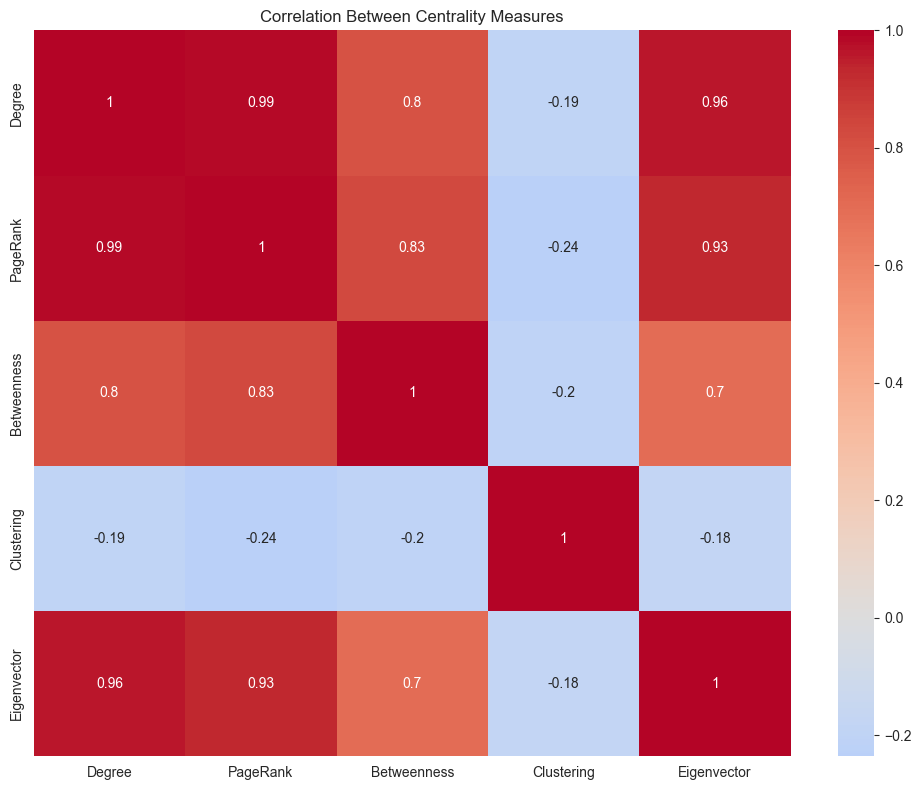

In [86]:
# -- dataframe with all centrality measures
centrality_df = pd.DataFrame({
    'Degree': degree_cent,
    'PageRank': pagerank_cent,
    'Betweenness': betweenness_cent,
    'Clustering': clustering_coef
})

if eigenvector_cent:
    centrality_df['Eigenvector'] = pd.Series(eigenvector_cent)

# -- correlation between centrality measures
plt.figure(figsize=(10, 8))
sns.heatmap(centrality_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Centrality Measures')
plt.tight_layout()
plt.show()

## 4. Community Detection

### 4.1 K-Core Decomposition

In [87]:
# -- K-Core decomposition
G_without_selfloops = G.copy()
G_without_selfloops.remove_edges_from(nx.selfloop_edges(G_without_selfloops))
core_numbers = nx.core_number(G_without_selfloops)
max_core = max(core_numbers.values())
print(f"Maximum k-core: {max_core}")

# -- get the k-core for different values of k
core_distribution = Counter(core_numbers.values())
print("\nCore number distribution:")
for k in sorted(core_distribution.keys()):
    print(f"  {k}-core: {core_distribution[k]} nodes")

Maximum k-core: 34

Core number distribution:
  0-core: 19 nodes
  1-core: 95 nodes
  2-core: 37 nodes
  3-core: 37 nodes
  4-core: 33 nodes
  5-core: 29 nodes
  6-core: 20 nodes
  7-core: 21 nodes
  8-core: 25 nodes
  9-core: 18 nodes
  10-core: 16 nodes
  11-core: 23 nodes
  12-core: 14 nodes
  13-core: 17 nodes
  14-core: 15 nodes
  15-core: 10 nodes
  16-core: 24 nodes
  17-core: 25 nodes
  18-core: 37 nodes
  19-core: 29 nodes
  20-core: 28 nodes
  21-core: 39 nodes
  22-core: 8 nodes
  23-core: 26 nodes
  24-core: 19 nodes
  25-core: 28 nodes
  26-core: 26 nodes
  27-core: 59 nodes
  28-core: 16 nodes
  29-core: 46 nodes
  30-core: 29 nodes
  31-core: 10 nodes
  32-core: 36 nodes
  33-core: 12 nodes
  34-core: 79 nodes


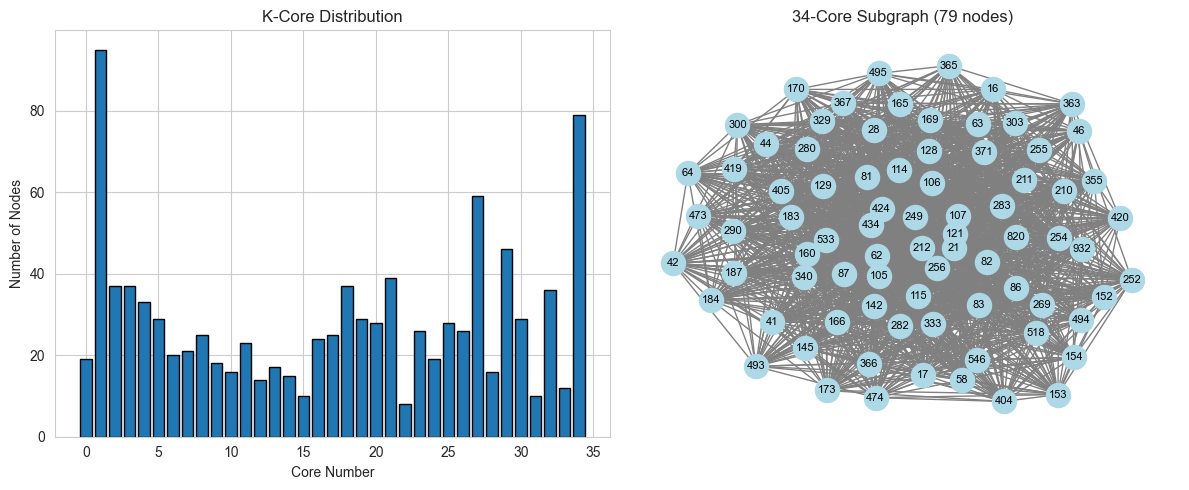

In [88]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(core_distribution.keys(), core_distribution.values(), edgecolor='black')
plt.xlabel('Core Number')
plt.ylabel('Number of Nodes')
plt.title('K-Core Distribution')

plt.subplot(1, 2, 2)
# -- let's extract maximum k-core
k_core = nx.k_core(G_without_selfloops, k=max_core)
pos = nx.spring_layout(k_core, seed=42)
nx.draw(k_core, pos, node_color='lightblue', node_size=300, 
        with_labels=True, font_size=8, edge_color='gray')
plt.title(f'{max_core}-Core Subgraph ({k_core.number_of_nodes()} nodes)')

plt.tight_layout()
plt.show()

### 4.2 K-Clique Communities

Number of maximal cliques: 42728
Largest clique size: 18
Average clique size: 9.63


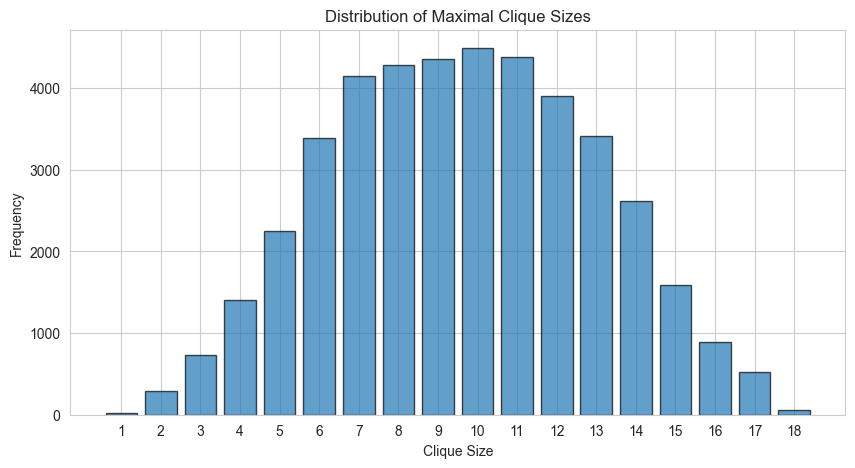

In [89]:
# --  find all maximal cliques
cliques = list(nx.find_cliques(G))
clique_sizes = [len(c) for c in cliques]

print(f"Number of maximal cliques: {len(cliques)}")
print(f"Largest clique size: {max(clique_sizes)}")
print(f"Average clique size: {np.mean(clique_sizes):.2f}")

# -- clique size distribution
clique_dist = Counter(clique_sizes)
plt.figure(figsize=(10, 5))
plt.bar(clique_dist.keys(), clique_dist.values(), edgecolor='black', alpha=0.7)
plt.xlabel('Clique Size')
plt.ylabel('Frequency')
plt.title('Distribution of Maximal Clique Sizes')
plt.xticks(range(min(clique_sizes), max(clique_sizes)+1))
plt.show()

### 4.3 Louvain Algorithm (Modularity-based)

In [90]:
# Louvain community detection
from networkx.algorithms import community as nx_comm

louvain_communities = nx_comm.greedy_modularity_communities(G)
louvain_modularity = nx_comm.modularity(G, louvain_communities)

print(f"Louvain Algorithm:")
print(f"  Number of communities: {len(louvain_communities)}")
print(f"  Modularity: {louvain_modularity:.4f}")
print(f"  Community sizes: {sorted([len(c) for c in louvain_communities], reverse=True)}")

Louvain Algorithm:
  Number of communities: 44
  Modularity: 0.3666
  Community sizes: [368, 321, 103, 89, 58, 9, 9, 9, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### 4.4 Girvan-Newman Algorithm

In [91]:
# -- Girvan-Newman (edge betweenness)
from networkx.algorithms.community import girvan_newman

# -- get first level of Girvan-Newman
comp = girvan_newman(G)
gn_communities = tuple(sorted(c) for c in next(comp))
gn_modularity = nx_comm.modularity(G, gn_communities)

print(f"\nGirvan-Newman Algorithm (1 split):")
print(f"  Number of communities: {len(gn_communities)}")
print(f"  Modularity: {gn_modularity:.4f}")
print(f"  Community sizes: {[len(c) for c in gn_communities]}")


Girvan-Newman Algorithm (1 split):
  Number of communities: 21
  Modularity: 0.0031
  Community sizes: [980, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### 4.5 Community Quality Metrics

In [92]:
# -- Compute community quality metrics for Louvain communities
def compute_community_metrics(G, communities):
    """Compute various community quality metrics"""
    metrics = []
    
    for i, community in enumerate(communities):
        subgraph = G.subgraph(community)
        
        # -- internal density
        internal_edges = subgraph.number_of_edges()
        n = len(community)
        max_edges = n * (n - 1) / 2
        internal_density = internal_edges / max_edges if max_edges > 0 else 0
        
        # -- cut edges (edges leaving the community)
        cut_edges = 0
        for node in community:
            for neighbor in G.neighbors(node):
                if neighbor not in community:
                    cut_edges += 1
        
        # -- conductance
        total_edges = 2 * internal_edges + cut_edges
        conductance = cut_edges / total_edges if total_edges > 0 else 0
        
        metrics.append({
            'community': i,
            'size': n,
            'internal_density': internal_density,
            'cut_edges': cut_edges,
            'conductance': conductance
        })
    
    return pd.DataFrame(metrics)

louvain_metrics = compute_community_metrics(G, louvain_communities)
print("\nLouvain Community Metrics:")
print(louvain_metrics)
print(f"\nAverage Internal Density: {louvain_metrics['internal_density'].mean():.4f}")
print(f"Average Conductance: {louvain_metrics['conductance'].mean():.4f}")


Louvain Community Metrics:
    community  size  internal_density  cut_edges  conductance
0           0   368          0.077731       4173     0.284439
1           1   321          0.074085       3491     0.314476
2           2   103          0.187322       1429     0.420665
3           3    89          0.252298        663     0.251232
4           4    58          0.227465        502     0.400319
5           5     9          0.555556         53     0.569892
6           6     9          0.388889         13     0.317073
7           7     9          0.388889         63     0.692308
8           8     2          3.000000          8     0.571429
9           9     2          3.000000         10     0.625000
10         10     2          1.000000          3     0.600000
11         11     1          0.000000          2     0.500000
12         12     1          0.000000          1     0.333333
13         13     1          0.000000          5     0.714286
14         14     1          0.000000     

### 4.6 Visualize Communities

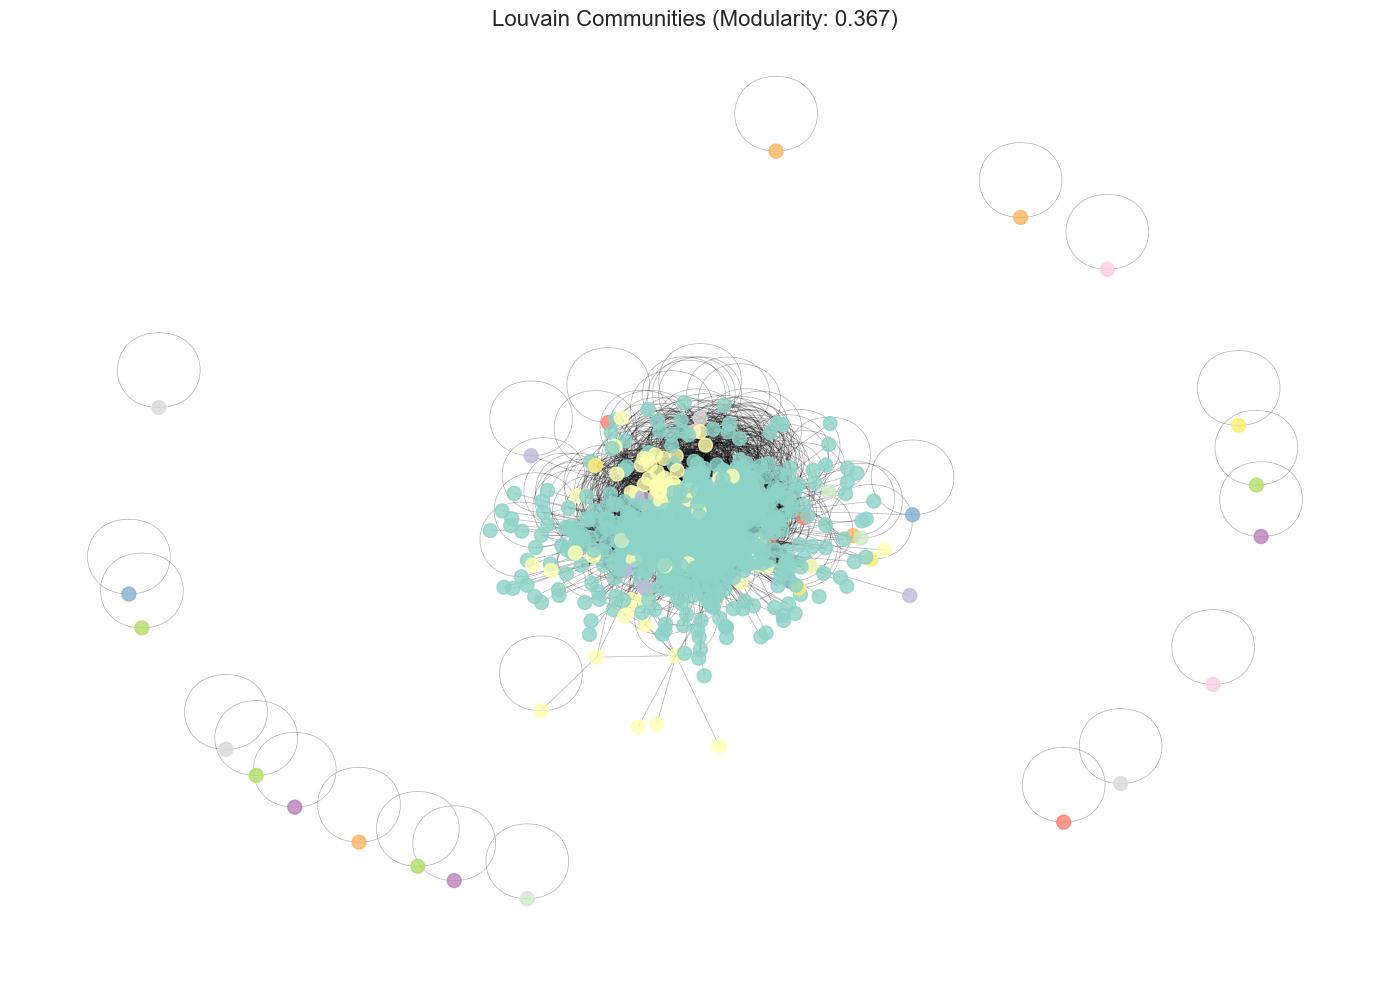

In [93]:
# -- visualize communities detected by Louvain
plt.figure(figsize=(14, 10))

# -- create node colors based on community
node_colors = {}
colors = plt.cm.Set3(np.linspace(0, 1, len(louvain_communities)))

for idx, community in enumerate(louvain_communities):
    for node in community:
        node_colors[node] = colors[idx]

# -- layout
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=[node_colors[n] for n in G.nodes()],
                        node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)

plt.title(f'Louvain Communities (Modularity: {louvain_modularity:.3f})', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()